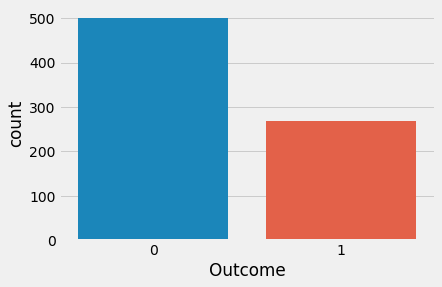

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight')

diab = pd.read_csv('diabetes.csv')
diab.isnull().sum()

sns.countplot(x='Outcome', data=diab)
plt.show()

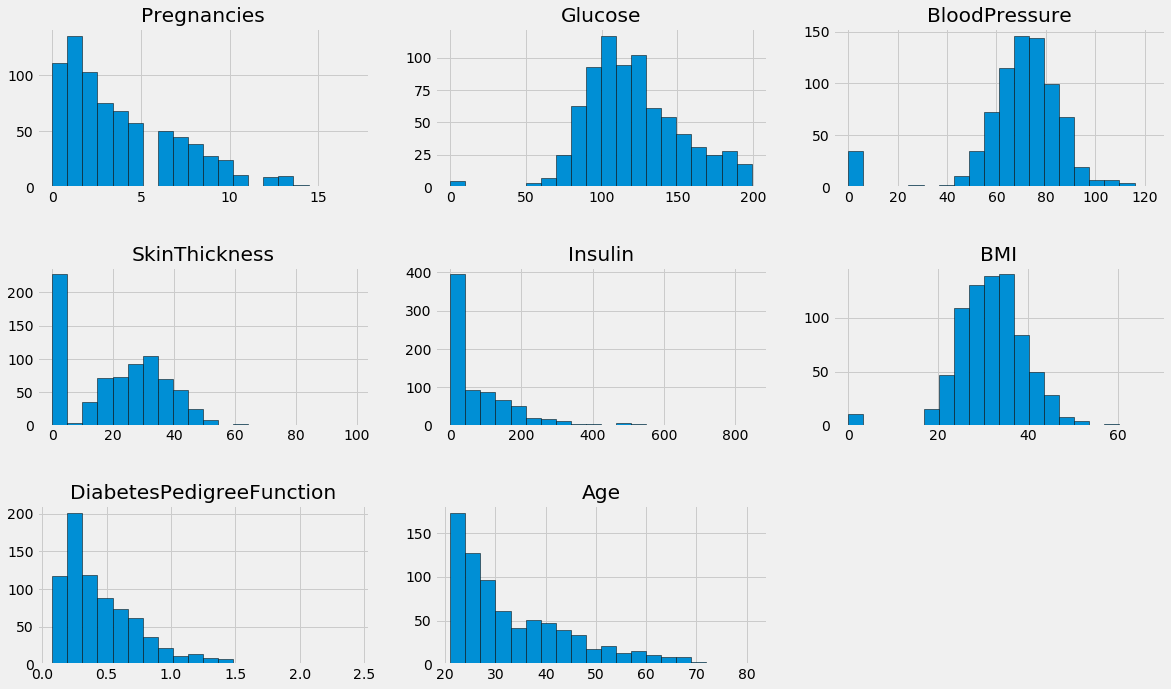

In [6]:
columns=diab.columns[:8]
plt.subplots(figsize=(18, 15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()


In [11]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [13]:
outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [19]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.6510416666666666


In [7]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))


The accuracy of the Logistic Regression is 0.7760416666666666


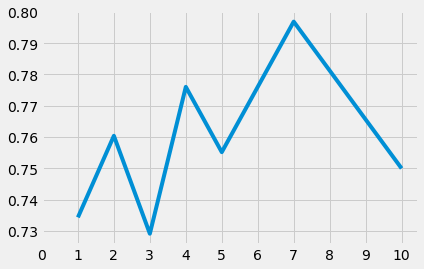

Accuracies for different values of n are: [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75      ]


In [9]:
a_index=list(range(1,11))
a=pd.Series()
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [10]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)
models_dataframe.columns=['Accuracy']
print(models_dataframe)



                     Accuracy
Linear Svm           0.770833
Radial Svm           0.651042
Logistic Regression  0.776042
KNN                  0.729167


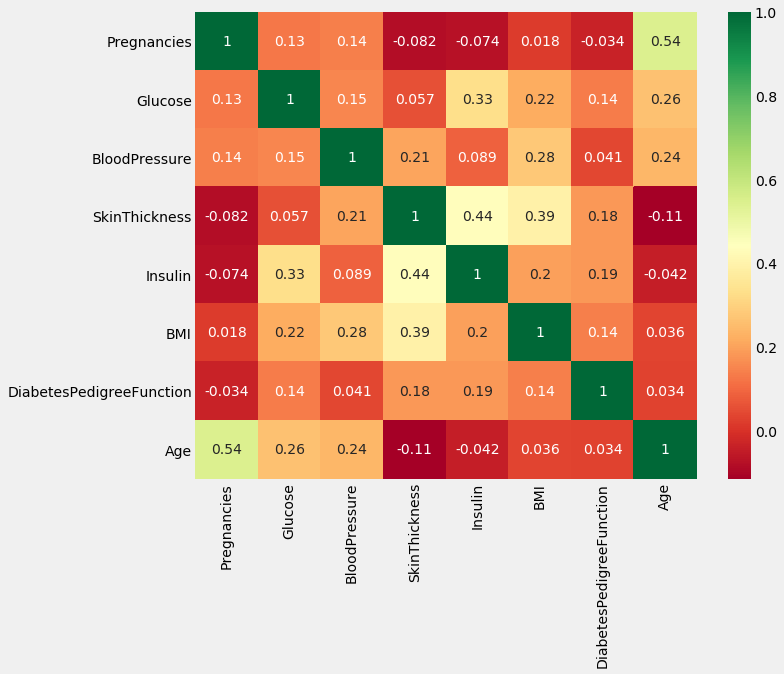

In [11]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
print(pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False))

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64


In [13]:
diab2=diab[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
from sklearn.preprocessing import StandardScaler
features=diab2[diab2.columns[:4]]
features_standard=StandardScaler().fit_transform(features)
x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
x['Outcome']=diab2['Outcome']
outcome = x['Outcome']
train1,test1 = train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1 = train1[train1.columns[:4]]
test_X1 = test1[test1.columns[:4]]
train_Y1 = train1['Outcome']
test_Y1 = test1['Outcome']

In [15]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)
new_models_dataframe.columns=['New Accuracy']

new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
print(new_models_dataframe)



                     New Accuracy  Accuracy  Increase
Linear Svm               0.781250  0.770833  0.010417
Radial Svm               0.770833  0.651042  0.119792
Logistic Regression      0.776042  0.776042  0.000000
KNN                      0.729167  0.729167  0.000000


In [18]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

kfold = KFold(n_splits=10, random_state=22) 

xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:4]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame(abc,index=classifiers)
new_models_dataframe2.columns = ['CV Mean']
print(new_models_dataframe2)


                      CV Mean
Linear Svm           0.781250
Radial Svm           0.770833
Logistic Regression  0.776042
KNN                  0.729167


In [17]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)],
                       voting='soft', weights=[3,2]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))


The accuracy for Linear SVM and Logistic Regression is: 0.78125
